Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Applied Modeling, Module 3

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploration, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Share at least 1 visualization on Slack.

(If you have not yet completed an initial model yet for your portfolio project, then do today's assignment using your Tanzania Waterpumps model.)

## Stretch Goals
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

## Links
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
url = 'https://raw.githubusercontent.com/JeanFraga/DS-Unit-2-Applied-Modeling/master/data/Restaurant_Consumer_Data_merged'

import pandas as pd

df = pd.read_csv(url)

df.head()

,userID,placeID,rating,food_rating,service_rating,Ulatitude,Ulongitude,smoker,drink_level,dress_preference,...,Rpayment_Diners_Club,Rpayment_Discover,Rpayment_Japan_Credit_Bureau,Rpayment_MasterCard-Eurocard,Rpayment_VISA,Rpayment_Visa,Rpayment_bank_debit_cards,Rpayment_cash,Rpayment_checks,Rpayment_gift_certificates
0,U1077,135085,2,2,2,22.156469,-100.98554,False,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,U1077,135038,2,2,1,22.156469,-100.98554,False,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,U1077,132825,2,2,2,22.156469,-100.98554,False,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,U1077,135060,1,2,2,22.156469,-100.98554,False,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,U1077,135027,0,1,1,22.156469,-100.98554,False,2,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [3]:
from sklearn.model_selection import train_test_split

target1 = 'rating'
target2 = 'food_rating'
target3 = 'service_rating'

X = df.drop(columns=[target1, target2, target3])
y1 = df[target1]
y2 = df[target2]
y3 = df[target3]

X_train, X_test= train_test_split(X, test_size=0.2, random_state=7)
y1_train, y1_test,y2_train, y2_test,y3_train, y3_test= train_test_split(y1,y2,y3, test_size=0.2, random_state=7)
X_train.shape, X_test.shape,y1_train.shape, y1_test.shape,y2_train.shape, y2_test.shape,y3_train.shape, y3_test.shape

((928, 495), (233, 495), (928,), (233,), (928,), (233,), (928,), (233,))

# Rating(y1) feature importance

## I will use 

### Weight	Feature 

0.0086 ± 0.0000	dress_code

0.0060 ± 0.0128	weight

0.0052 ± 0.0100	dress_preference

0.0043 ± 0.0133	placeID

0.0043 ± 0.0000	hours_12:00-23:30;

0.0026 ± 0.0159	Ulongitude

0.0026 ± 0.0042	Rpayment_bank_debit_cards

0.0026 ± 0.0042	parking_lot_public

0.0026 ± 0.0042	Rcuisine_Mexican_y

0.0026 ± 0.0042	Rcuisine_International_y

0.0017 ± 0.0069	smoking_area

0.0017 ± 0.0042	Rpayment_cash

0.0009 ± 0.0034	Rcuisine_Tunisian

0.0009 ± 0.0034	Rcuisine_Pizzeria_y

0.0009 ± 0.0034	hours_08:00-17:00;

0.0009 ± 0.0034	Rcuisine_Fast_Food_y

0.0009 ± 0.0034	hours_07:00-23:30;

0.0009 ± 0.0034	hours_10:00-18:00;

0.0009 ± 0.0034	hours_13:00-23:00;

0.0009 ± 0.0034	hours_08:00-18:00;

0.0009 ± 0.0034	Rcuisine_North_African

0.0009 ± 0.0034	Rcuisine_British

0.0009 ± 0.0034	hours_08:00-23:30;

0.0009 ± 0.0213	color

0.0009 ± 0.0064	activity

0.0000 ± 0.0163	interest


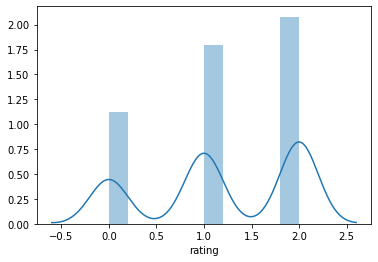

In [4]:
%matplotlib inline
import seaborn as sns
sns.distplot(y1_train);

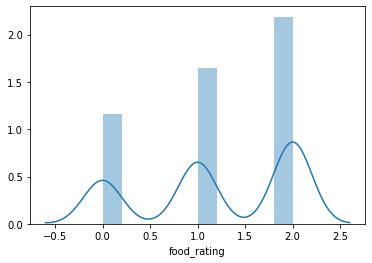

In [5]:
%matplotlib inline
import seaborn as sns
sns.distplot(y2_train);

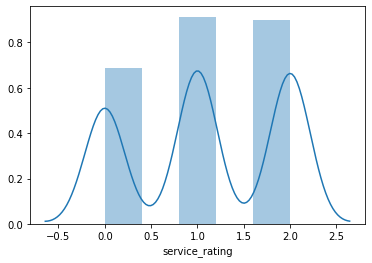

In [6]:
%matplotlib inline
import seaborn as sns
sns.distplot(y3_train);

In [14]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.TargetEncoder(),  
    StandardScaler(), 
    LinearRegression()
)

lr.fit(X_train, y1_train)
print('Linear Regression R^2', lr.score(X_test, y1_test))
lr.fit(X_train, y2_train)
print('Linear Regression R^2', lr.score(X_test, y2_test))
lr.fit(X_train, y3_train)
print('Linear Regression R^2', lr.score(X_test, y3_test))

Linear Regression R^2 0.3051169654998913
Linear Regression R^2 0.20510533772240824
Linear Regression R^2 0.21684541164236415


In [15]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y1_train)
y1_pred = gb.predict(X_test)
print('Gradient Boosting R^2', r2_score(y1_test, y1_pred))
gb.fit(X_train, y2_train)
y2_pred = gb.predict(X_test)
print('Gradient Boosting R^2', r2_score(y2_test, y2_pred))
gb.fit(X_train, y3_train)
y3_pred = gb.predict(X_test)
print('Gradient Boosting R^2', r2_score(y3_test, y3_pred))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Gradient Boosting R^2 0.40721103915596524


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Gradient Boosting R^2 0.26681122118879663


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Gradient Boosting R^2 0.29568321783713625


In [26]:
example = X_test.iloc[[10]]
example

,userID,placeID,Ulatitude,Ulongitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,...,Rpayment_Diners_Club,Rpayment_Discover,Rpayment_Japan_Credit_Bureau,Rpayment_MasterCard-Eurocard,Rpayment_VISA,Rpayment_Visa,Rpayment_bank_debit_cards,Rpayment_cash,Rpayment_checks,Rpayment_gift_certificates
912,U1027,135062,22.16515,-100.987015,True,2,3,3,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
pred = lr.predict(example)[0]
print(f'Predicted food Rate: {pred:.2f}')

Predicted food Rate: 0.77


In [30]:
from pdpbox.pdp import pdp_isolate, pdp_plot
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

# Rating(y2) feature importance

## I will use 

### Weight	Feature 

0.0146 ± 0.0042	Rcuisine_International_y

0.0103 ± 0.0150	weight

0.0086 ± 0.0094	dress_code

0.0086 ± 0.0144	transport

0.0052 ± 0.0034	hours_08:30-21:00;

0.0052 ± 0.0034	Rcuisine_American_x

0.0052 ± 0.0034	franchise

0.0052 ± 0.0148	ambience

0.0043 ± 0.0000	Rcuisine_Seafood_x

0.0043 ± 0.0000	Rcuisine_Burgers_x

0.0043 ± 0.0054	Rcuisine_Cafe-Coffee_Shop_x

0.0043 ± 0.0000	Rcuisine_Family_x

0.0043 ± 0.0000	Rpayment_bank_debit_cards

0.0043 ± 0.0094	smoker

0.0043 ± 0.0000	Rcuisine_Sushi_x

0.0043 ± 0.0094	budget

0.0034 ± 0.0034	Upayment_MasterCard-Eurocard

0.0034 ± 0.0064	Rcuisine_Cafeteria_y

0.0034 ± 0.0034	Rcuisine_Fast_Food_x

0.0034 ± 0.0034	Rcuisine_Asian_x

0.0034 ± 0.0137	personality

0.0026 ± 0.0042	hours_09:00-23:30;

0.0017 ± 0.0042	Rcuisine_Fast_Food_y

0.0017 ± 0.0042	hours_09:00-21:00;

0.0017 ± 0.0088	Rpayment_VISA

0.0009 ± 0.0034	Rcuisine_Caribbean_x

0.0009 ± 0.0034	Rcuisine_Burgers_y

0.0009 ± 0.0034	Rcuisine_Dutch-Belgian_x

0.0009 ± 0.0034	hours_08:00-13:00;

0.0009 ± 0.0034	hours_18:30-23:30;

0.0009 ± 0.0034	Rambience

0.0009 ± 0.0034	hours_20:00-01:30;

0.0009 ± 0.0034	Rcuisine_Barbecue_x

0.0009 ± 0.0034	Rcuisine_Pizzeria_x

0.0009 ± 0.0034	Rcuisine_British

0.0009 ± 0.0100	dress_preference

0.0009 ± 0.0064	religion

0.0009 ± 0.0084	color

0.0009 ± 0.0064	hours_08:00-23:30;

0.0009 ± 0.0199	price

Gradient Boosting R^2 0.26681122118879663


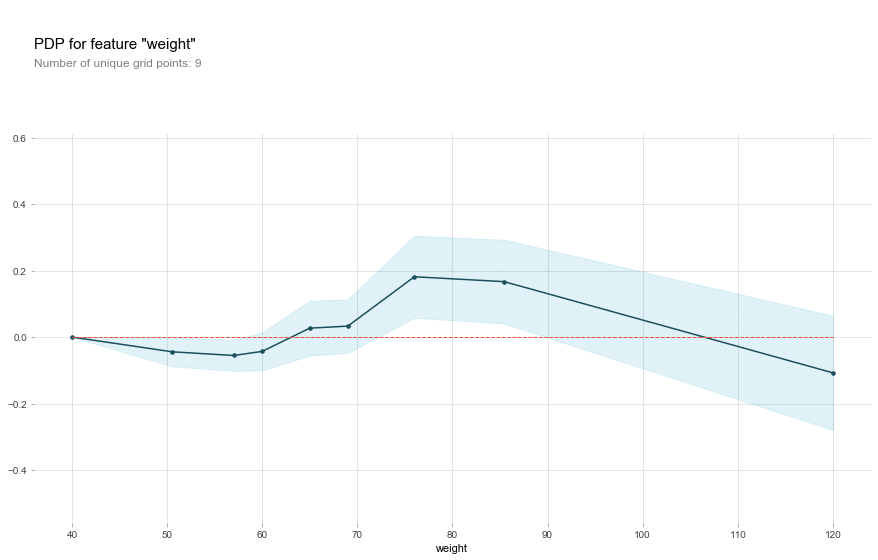

In [31]:
from pdpbox.pdp import pdp_isolate, pdp_plot

gb.fit(X_train, y2_train)
y2_pred = gb.predict(X_test)
print('Gradient Boosting R^2', r2_score(y2_test, y2_pred))

feature = 'weight'

isolated = pdp_isolate(
    model=gb, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot



gb.fit(X_train, y2_train)
y2_pred = gb.predict(X_test)
print('Gradient Boosting R^2', r2_score(y2_test, y2_pred))

feature = 'weight'

isolated = pdp_isolate(
    model=gb, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

In [56]:
import category_encoders as ce
#from sklearn.impute import SimpleImputer
#from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

eval_set = [(X_train_encoded, y2_train), 
            (X_test_encoded, y2_test)]

model = XGBClassifier(
    n_estimators=1000, # <= 1000 trees, depends on early stopping
    max_depth=15,       # try deeper trees because of high cardinality categoricals
    learning_rate=.1, # try higher learning rate
    n_jobs=-1
)

model.fit(X_train_encoded, y2_train, eval_set=eval_set, 
          eval_metric=['merror'], early_stopping_rounds=100)

[0]	validation_0-merror:0.096983	validation_1-merror:0.407725
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.076509	validation_1-merror:0.446352
[2]	validation_0-merror:0.076509	validation_1-merror:0.44206
[3]	validation_0-merror:0.067888	validation_1-merror:0.446352
[4]	validation_0-merror:0.063578	validation_1-merror:0.424893
[5]	validation_0-merror:0.056034	validation_1-merror:0.44206
[6]	validation_0-merror:0.049569	validation_1-merror:0.433476
[7]	validation_0-merror:0.046336	validation_1-merror:0.416309
[8]	validation_0-merror:0.039871	validation_1-merror:0.420601
[9]	validation_0-merror:0.036638	validation_1-merror:0.424893
[10]	validation_0-merror:0.03125	validation_1-merror:0.424893
[11]	validation_0-merror:0.02694	validation_1-merror:0.429185
[12]	validation_0-merror:0.023707	validation_1-merror:0.424893
[13]	validation_0-merror:0.0226

[140]	validation_0-merror:0	validation_1-merror:0.390558
[141]	validation_0-merror:0	validation_1-merror:0.390558
[142]	validation_0-merror:0	validation_1-merror:0.390558
[143]	validation_0-merror:0	validation_1-merror:0.390558
[144]	validation_0-merror:0	validation_1-merror:0.386266
[145]	validation_0-merror:0	validation_1-merror:0.390558
[146]	validation_0-merror:0	validation_1-merror:0.386266
[147]	validation_0-merror:0	validation_1-merror:0.390558
[148]	validation_0-merror:0	validation_1-merror:0.390558
[149]	validation_0-merror:0	validation_1-merror:0.390558
[150]	validation_0-merror:0	validation_1-merror:0.390558
[151]	validation_0-merror:0	validation_1-merror:0.390558
[152]	validation_0-merror:0	validation_1-merror:0.39485
[153]	validation_0-merror:0	validation_1-merror:0.39485
[154]	validation_0-merror:0	validation_1-merror:0.39485
[155]	validation_0-merror:0	validation_1-merror:0.39485
[156]	validation_0-merror:0	validation_1-merror:0.39485
[157]	validation_0-merror:0	validati

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Gradient Boosting accuracy 0.630901287553648


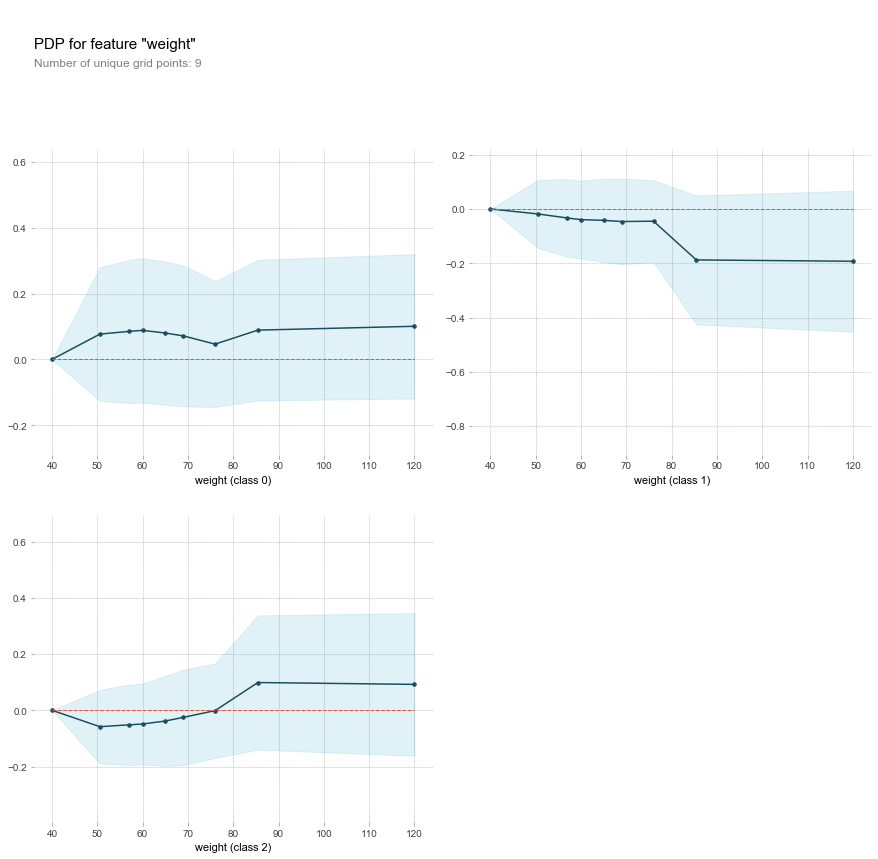

In [65]:
from pdpbox.pdp import pdp_isolate, pdp_plot
from sklearn.metrics import accuracy_score
#print('Gradient Boosting R^2', r2_score(y2_test, y2_pred))

model.fit(X_train_encoded, y2_train)
y2_pred = model.predict(X_test_encoded)
print('Gradient Boosting accuracy', accuracy_score(y2_test, y2_pred))

feature = 'weight'

isolated = pdp_isolate(
    model=model, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

(<Figure size 1080x1080 with 4 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2921d6369c8>,
  'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x2921e27a948>,
   <matplotlib.axes._subplots.AxesSubplot at 0x29203a3f088>]})

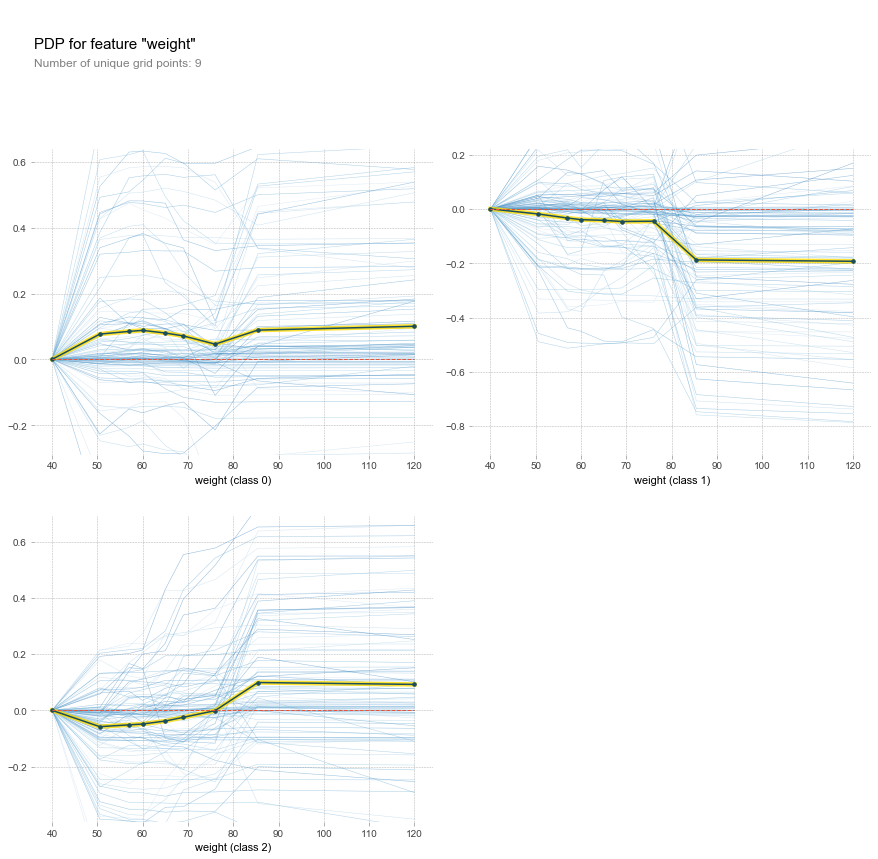

In [66]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100) # Confusing parameter name
#plt.xlim(0,150000);

(<Figure size 1080x1080 with 4 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x292185aeb88>,
  'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x2921716e548>,
   <matplotlib.axes._subplots.AxesSubplot at 0x29217108c08>]})

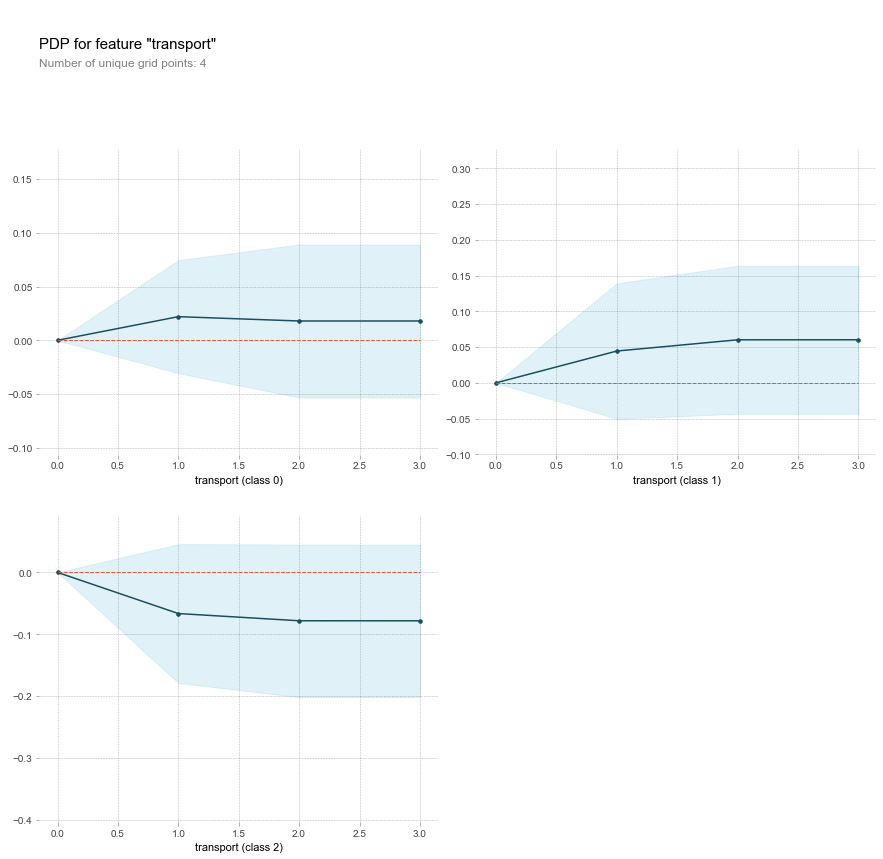

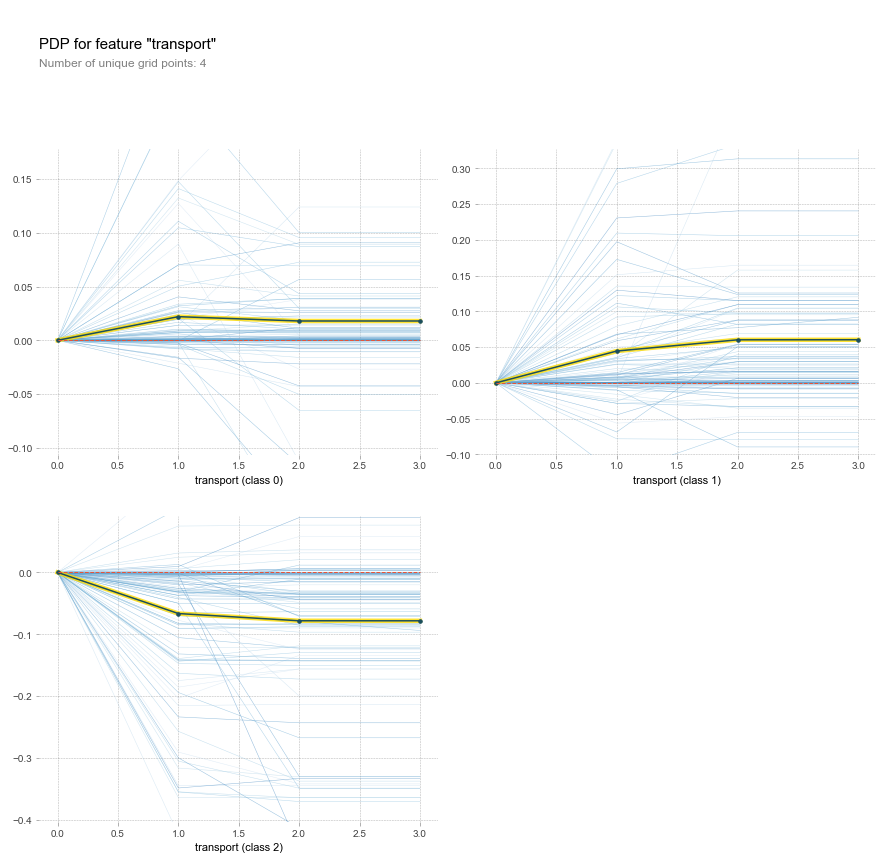

In [69]:
feature = 'transport'

isolated = pdp_isolate(
    model=model, 
    dataset=X_test_encoded, 
    model_features=X_test_encoded.columns, 
    feature=feature
    #num_grid_points=50
)

pdp_plot(isolated, feature_name=feature);
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)

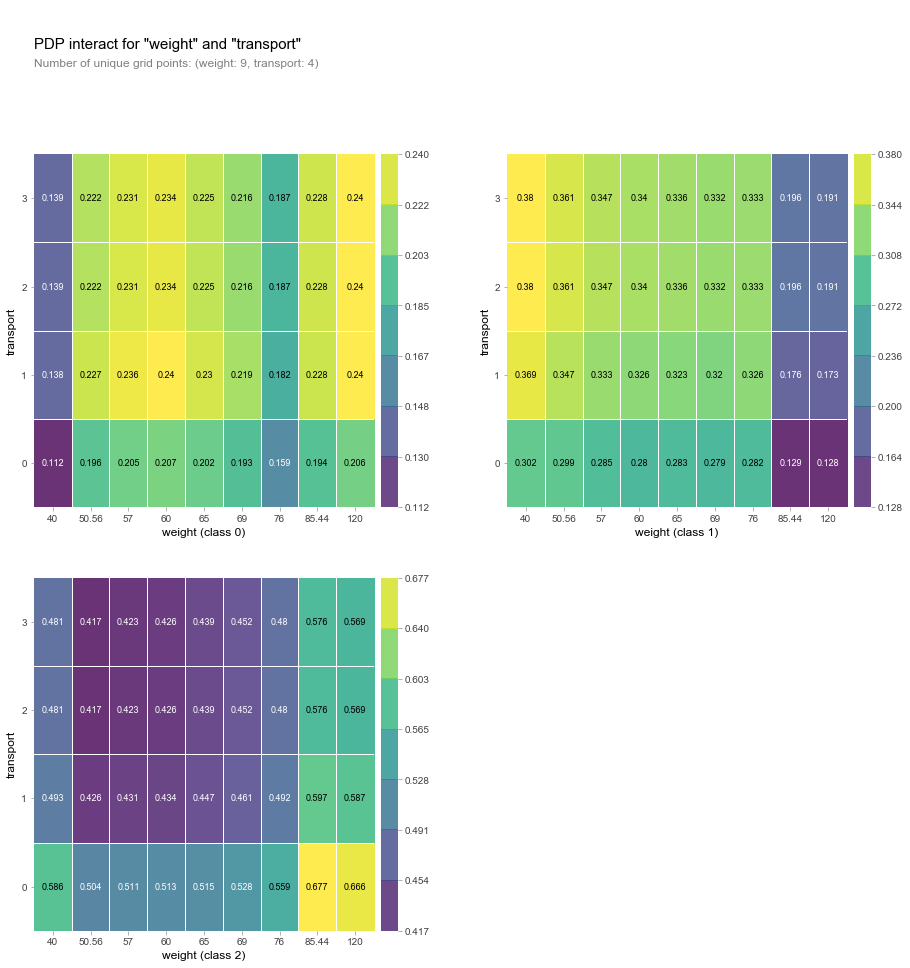

In [71]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['weight', 'transport']

interaction = pdp_interact(
    model=model, 
    dataset=X_test_encoded,
    model_features=X_test_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);